## Analysis of the rental data

Analysis of the rental data already downloded, parsed, and converted to csv. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [36]:
CITY_NAME = 'lausanne'

In [2]:
city_path = '../../rental_list/' + CITY_NAME + '/' 
all_rental_data_path = city_path + 'all_rental_data'
combined_data_path = all_rental_data_path + '/combined/rental_all.csv'
df = pd.read_csv(combined_data_path)

In [17]:
df.tail()

,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link
578,5104296,75.0,3.5,flat,"Avenue de Sévelin, 1004 Lausanne, VD",Location d’appartement neuf,NaN,None,en/d/flat-rent-\nlausanne/5104296?s=2&t=1&l=20...
579,5125689,40.0,2.0,flat,"1012 Lausanne, VD",Appartement 2pièces à lausanne 1300.- charges ...,NaN,None,en/d/flat-rent-\nlausanne/5125689?s=2&t=1&l=20...
580,5144165,NaN,1.0,studio,"Rue Caroline 2 - Enning 3, 1003 Lausanne, VD",Sous location à usage de bureau,NaN,None,en/d/studio-rent-\nlausanne/5144165?s=2&t=1&l=...
581,5146045,106.0,3.5,flat,"1004 Lausanne, VD",Au centre ville,NaN,None,en/d/flat-rent-\nlausanne/5146045?s=2&t=1&l=20...
582,5159698,28.0,1.0,studio,"1018 Lausanne, VD",Studio meublé à louer ecublens,NaN,None,en/d/studio-rent-\nlausanne/5159698?s=2&t=1&l=...


In [8]:
df['Id'].value_counts()[df['Id'].value_counts() > 1]

Series([], Name: Id, dtype: int64)

## New useful features

In [149]:
# price per room and price per surface area
df['RentPerArea'] = df['Rent'] / df['SurfaceArea']
df['RentPerRoom'] = df['Rent'] / df['NumRooms']
df['AreaPerRoom'] = df['SurfaceArea'] / df['NumRooms']

## Some statistical info

In [41]:
stats = df.describe()
stats

,Id,SurfaceArea,NumRooms,Rent,RentPerArea,RentPerRoom
count,5.830000e+02,521.000000,583.000000,577.000000,516.000000,577.000000
mean,5.054047e+06,75.702495,2.842196,2007.807626,35.602925,764.597533
std,2.361979e+05,59.512844,1.330311,1038.502813,125.839797,307.375522
min,1.806661e+06,1.000000,1.000000,1.000000,0.013333,0.333333
25%,5.056375e+06,50.000000,2.000000,1395.000000,25.000000,588.888889
50%,5.127242e+06,69.000000,3.000000,1815.000000,28.630208,702.222222
75%,5.147026e+06,90.000000,3.500000,2400.000000,32.932301,880.000000
max,5.161200e+06,1000.000000,11.000000,10700.000000,2880.000000,2640.000000


In [22]:
stats['Rent']['mean']

2007.8076256499132

In [26]:
stats.Rent

2491.7888048629725

In [62]:
print("The mean rental price in {} is {:0.5} CHF per month.".format(CITY_NAME.capitalize(), stats['Rent']['mean']))

The mean rental price in Lausanne is 2007.8 CHF per month.


In [63]:
print("The mean rental price per room in {} is {:0.5} CHF per month.".format(CITY_NAME.capitalize(), stats['RentPerRoom']['mean']))

The mean rental price per room in Lausanne is 764.6 CHF per month.


In [64]:
print("The mean rental price per meter square in {} is {:0.5} CHF per month.".format(CITY_NAME.capitalize(), stats['RentPerArea']['mean']))

The mean rental price per meter square in Lausanne is 35.603 CHF per month.


## Outliers

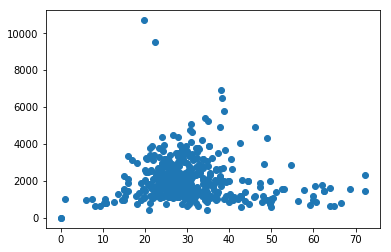

In [168]:
plt.scatter(x = df['RentPerArea'], y = df['Rent'])

In [171]:
df[df['RentPerArea'] > 2000]

,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link,RentPerArea,RentPerRoom,ZipCode,AreaPerRoom


In [ ]:
df.drop((df[df['RentPerArea'] > 2000]).index, inplace = True)

### Extract Zip Code from Address

In [60]:
CITY_NAME_C = CITY_NAME.capitalize()

In [115]:
def Extract_zip_code(address):
    n = len(address)
    l = len("Lausanne, VD")
    return int(address[-l - 5: - l -1])

In [117]:
for i in range(0, df.shape[0]):
    address = df['Address'][i]
    Extract_zip_code(address)

In [121]:
df['ZipCode'] = df['Address'].map(lambda x: Extract_zip_code(x))

In [124]:
df.head(2)

,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link,RentPerArea,RentPerRoom,ZipCode
0,5154005,50.0,2.5,flat,"Chemin de Champrilly 21, 1004 Lausanne, VD",Grand 2 pièces avec balcon,1510.0,None,en/d/flat-rent-\nlausanne/5154005?s=2&t=1&l=20...,30.200000,604.0,1004
1,5159207,95.0,4.0,flat,"Av. de Morges 39, 1004 Lausanne, VD",Bel appartement de 4 pièces avec balcon,2100.0,None,en/d/flat-rent-\nlausanne/5159207?s=2&t=1&l=20...,22.105263,525.0,1004


## Rent and Zip Code

In [182]:
zipVsRentMean = df[['ZipCode', 'RentPerArea', 'RentPerRoom', 'AreaPerRoom', 'SurfaceArea']]\
                .groupby(['ZipCode'], as_index = False).mean()

In [175]:
zipVsRentCount = df[['ZipCode', 'RentPerArea', 'RentPerRoom', 'AreaPerRoom']].groupby(['ZipCode'], as_index = False).count()

In [185]:
zipVsRentMean

,ZipCode,RentPerArea,RentPerRoom,AreaPerRoom,SurfaceArea
0,1000,25.884957,754.892256,29.201515,181.500000
1,1003,32.951379,982.194325,31.647968,86.640000
2,1004,28.670993,722.028545,26.283307,72.609023
3,1005,29.777010,769.201935,25.872742,80.235294
4,1006,34.260310,827.879586,25.704619,60.976190
5,1007,33.595169,786.727540,25.157599,61.711538
6,1010,27.928071,713.744083,27.300609,80.730769
7,1012,29.591872,787.720564,27.288123,77.092308
8,1015,NaN,650.000000,NaN,NaN
9,1018,28.152492,643.406592,28.319237,73.552239


In [144]:
import seaborn as sns

In [203]:
dftmp = df[(df['ZipCode'] != 1000) & (df['ZipCode'] != 1015)]

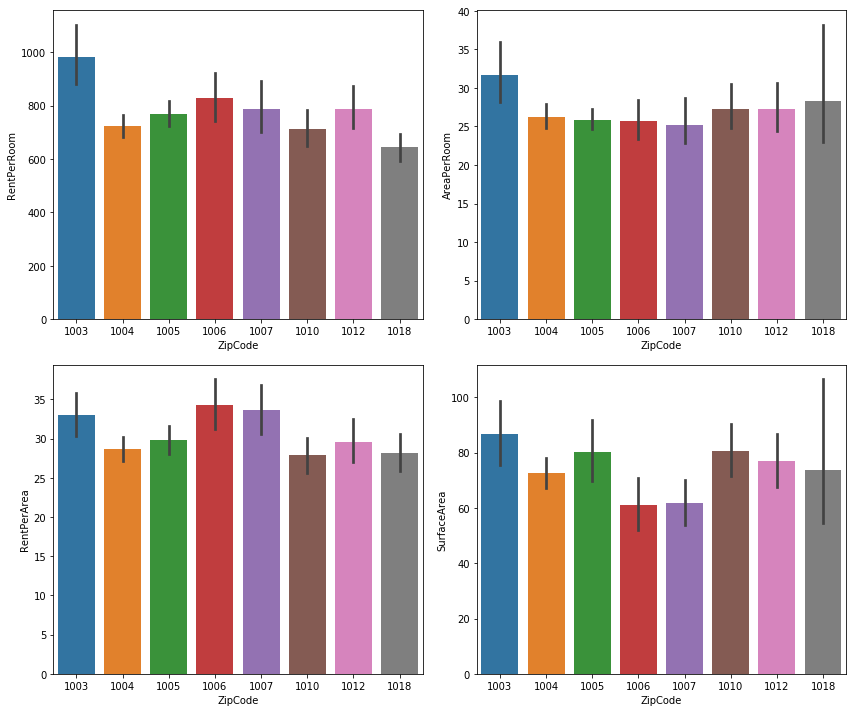

In [204]:
f, ax = plt.subplots(2, 2, figsize = (12, 10))
plt.subplot(2, 2, 1)
sns.barplot(x = 'ZipCode', y = 'RentPerRoom', data = dftmp)
plt.subplot(2, 2, 2)
sns.barplot(x = 'ZipCode', y = 'AreaPerRoom', data = dftmp)
plt.subplot(2, 2, 3)
sns.barplot(x = 'ZipCode', y = 'RentPerArea', data = dftmp)
plt.subplot(2, 2, 4)
sns.barplot(x = 'ZipCode', y = 'SurfaceArea', data = dftmp)
plt.tight_layout()